In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
df=pd.read_csv("/content/housing_dataset.csv")

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.isnull().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
df.drop(["Address"],axis=1,inplace=True)

In [8]:
#Split the data
X=df.drop(["Price"],axis=1)
y=df["Price"]

<Axes: >

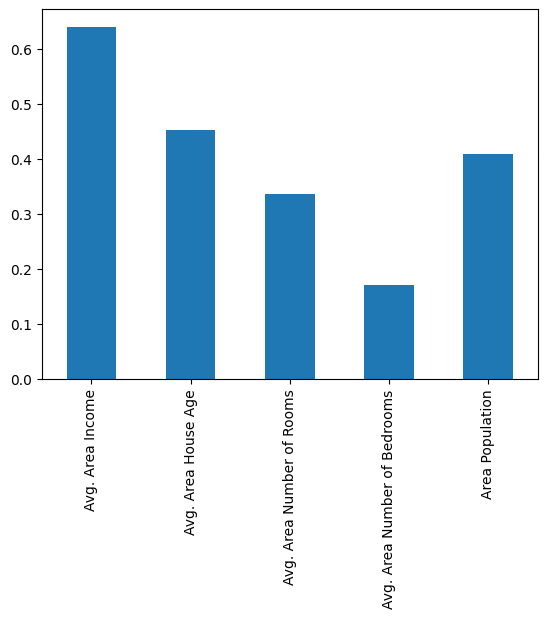

In [9]:
#Check the correlation of X with y (features with target)
correlation=X.corrwith(y)
correlation.plot(kind="bar")

In [10]:
correlation_matrix=df.corr()

<Axes: >

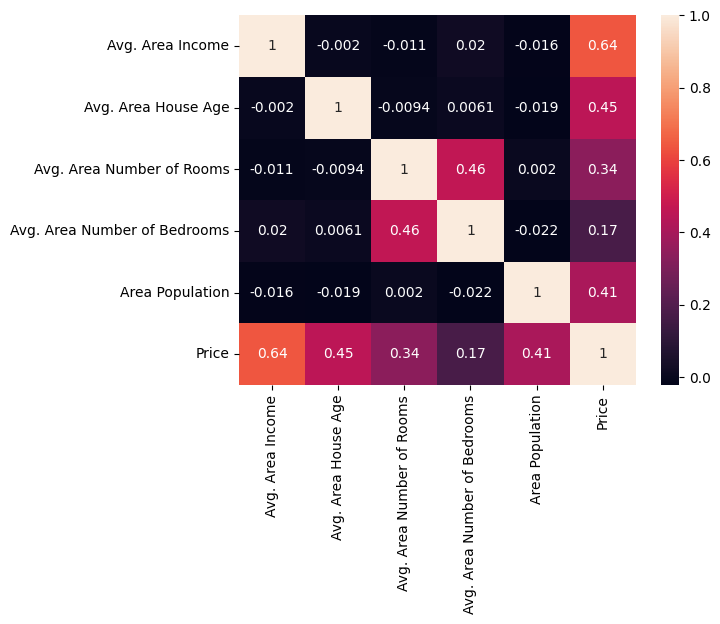

In [11]:
sns.heatmap(correlation_matrix,annot=True)

In [12]:
#As the feature is least correalted with the price columns so we drop it
X.drop(["Avg. Area Number of Bedrooms"],axis=1,inplace=True)

<Axes: >

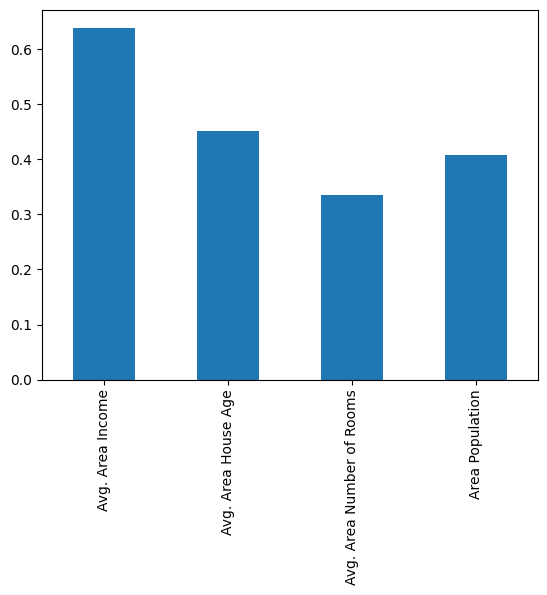

In [13]:
correlation_new=X.corrwith(y)
correlation_new.plot(kind="bar")

In [14]:
#Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=36)

In [15]:
#Linear regression
# The idea is to find the best fitting straight line that represents the relationship between dependent and independent features
# It fits the features on the line y =mx+c
# y=predicted output
# x=independent feature
# m=slope of line(determines how y value changes with x)
# c=intercept(value of y when x=0)
# The algorithm is used to find the best value of m and c minimizing the difference between predicted value and actual value


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr=LinearRegression()

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
lr_result=lr.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [21]:
print("performance:",r2_score(y_test,lr_result))

performance: 0.9206843263400026


In [22]:
print("error:",mean_squared_error(lr_result,y_test))

error: 10236595564.841595


<Axes: xlabel='Price'>

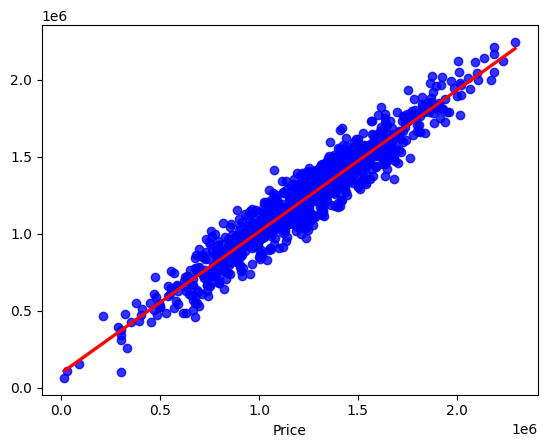

In [23]:
#plotting of actual result and predicted
sns.regplot(
    x= y_test,
    y = lr_result,
    line_kws={"color":"red"},
    scatter_kws={"color":"blue"}
)

In [24]:
#Polynomial Regression
#It works same as that of linear regression
#Instead it bends the curve or line by some angle so that the features can be fitted in best way


In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
pr=PolynomialFeatures(degree=10)

In [27]:
X_train_poly=pr.fit_transform(X_train)

In [28]:
X_test_poly=pr.fit_transform(X_test)

In [29]:
lr.fit(X_train_poly,y_train)

LinearRegression()

In [30]:
pr_result=lr.predict(X_test_poly)

In [31]:
print("performance",r2_score(y_test,pr_result))

performance 0.8102013531200454


In [32]:
print("error",mean_squared_error(y_test,pr_result))

error 24495687891.30982


<Axes: xlabel='Price'>

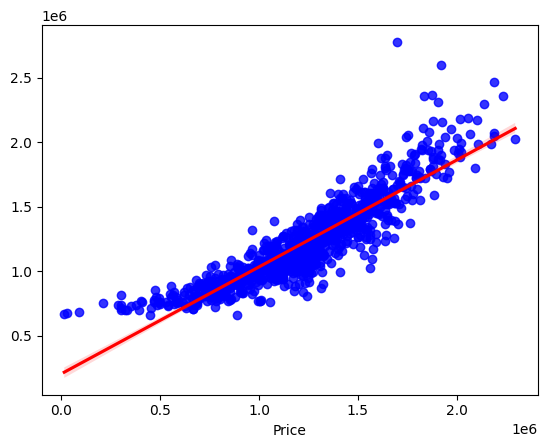

In [33]:
sns.regplot(
    x= y_test,
    y = pr_result,
    line_kws={"color":"red"},
    scatter_kws={"color":"blue"}
)

In [34]:
#Decsion tree Regression
#It selects the best node to split the data using informatin gain and least mean sqaured error(mse)
#The higesht (IG value/lowest mse value) of a feature is selected as the node to best split the data
#On the basis of all parent nodes the remaining nodes or features are selected for splitting the data in the best way

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
dtr=DecisionTreeRegressor(max_depth=12)

In [50]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=12)

In [51]:
dtr_result=dtr.predict(X_test)

In [52]:
print("accuracy:",r2_score(y_test,dtr_result))

accuracy: 0.7851486683101031


In [53]:
print("error:",mean_squared_error(y_test,dtr_result))

error: 27729023629.11332


<Axes: xlabel='Price'>

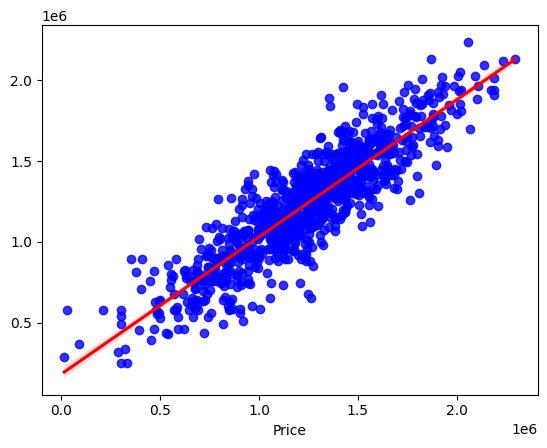

In [57]:
sns.regplot(
    x=y_test,
    y=dtr_result,
    line_kws={"color":"red"},
    scatter_kws={"color":"blue"}
)

In [58]:
#Random forest regression

#It takes decisions on the basis of multiple decsion trees
#It first breaks down the data into subsets by random sampling
#The data is provided to each decsion tree
#The final output is the  combined average of results of decision trees


In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
#n_estimators=number of decision trees
#random state=random picking of data

rfr=RandomForestRegressor(n_estimators=20,random_state=42)

In [62]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [63]:
rfr_result=rfr.predict(X_test)

In [64]:
print("accuracy:",r2_score(y_test,rfr_result))

accuracy: 0.8830755887293289


In [66]:
print("error:",mean_squared_error(y_test,rfr_result))

error: 15090433638.196812


In [ ]:
#knn : k nearest neighbour (k indicates the number of nearest neighbors)
#       it will search the value of nearest neigbourrs and takes their avg
#       takes it as the new value after takig the mean it will check which values it is nearest to which neighbour eg: 20000+23000/2 = 21500
#       it will predict the value to be 23000

In [68]:
from sklearn.neighbors import KNeighborsRegressor

In [82]:
knr=KNeighborsRegressor(n_neighbors=20)

In [83]:
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [84]:
knr_result=knr.predict(X_test)

In [85]:
print("Accuracy:",r2_score(y_test,knr_result))

Accuracy: 0.560969309283204


In [86]:
print("error:",mean_squared_error(y_test,knr_result))

error: 56661935958.40969


In [87]:
#SVR (Support Vector Regression)
# It is mainly used to mininze the erorr in predition.
# Instead of minimizing every error it allows to keep some some error but in a marginal value
# It tries to consider as many points in the range
# If the data is not linearly seperable it uses a kernel trick
# It creates a margin that specifies if values lies within it then the value inside the margin are considered to expectional or error free

In [88]:
from sklearn.svm import SVR

In [94]:
#epsilon-- upto what range do not show error
#kernel--- to seperate features

svr=SVR(epsilon=10000,kernel="linear")

In [95]:
svr.fit(X_train,y_train)

SVR(epsilon=10000, kernel='linear')

In [96]:
svr_result=svr.predict(X_test)

In [97]:
print("Accuracy:",r2_score(y_test,svr_result))

Accuracy: 0.5934791217180693


In [98]:
print("error:",mean_squared_error(y_test,svr_result))

error: 52466172543.335594
